<a href="https://colab.research.google.com/github/Criell/Data/blob/master/cooking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# load python packages
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib
import IPython
import sklearn
import pprint
import json
from pprint import pprint

# import sklearn packages
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder


# import keras packages
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras import backend as K

# upload dataset
!wget https://github.com/Criell/Data/blob/master/02_Cooking/train.json?raw=true
!wget https://github.com/Criell/Data/blob/master/02_Cooking/test.json?raw=true

!mv train.json\?raw\=true train.json
!mv test.json\?raw\=true test.json

Using TensorFlow backend.


--2020-07-10 15:26:07--  https://github.com/Criell/Data/blob/master/02_Cooking/train.json?raw=true
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/Criell/Data/raw/master/02_Cooking/train.json [following]
--2020-07-10 15:26:08--  https://github.com/Criell/Data/raw/master/02_Cooking/train.json
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Criell/Data/master/02_Cooking/train.json [following]
--2020-07-10 15:26:08--  https://raw.githubusercontent.com/Criell/Data/master/02_Cooking/train.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 20

In [ ]:
# reading json
with open('train.json') as f:
    trainJson = json.load(f)
    
with open('test.json') as f:
    testJson = json.load(f)

trainTxt = [" ".join(doc['ingredients']).lower() for doc in trainJson]
testTxt = [" ".join(doc['ingredients']).lower() for doc in testJson]  

labelsTxt = [doc['cuisine'] for doc in trainJson]


# dimensionality transformations
vec = TfidfVectorizer(binary=True)
train = vec.fit_transform(trainTxt)
test = vec.transform(testTxt)  
enc = LabelEncoder()
label = enc.fit_transform(labelsTxt)

In [ ]:
# type casting 
train = train.astype('float32')
test = test.astype('float32')
label = keras.utils.to_categorical(label)

In [ ]:
# Model (3 layers with 1000 nodes)
model = keras.Sequential()
model.add(keras.layers.Dense(1000, 
                             kernel_initializer=keras.initializers.he_normal(seed=1), 
                             activation='relu', input_dim=3010))
model.add(keras.layers.Dropout(0.81))
model.add(keras.layers.Dense(1000, 
                             kernel_initializer=keras.initializers.he_normal(seed=2), 
                             activation='relu'))
model.add(keras.layers.Dropout(0.81))
model.add(keras.layers.Dense(20, 
                             kernel_initializer=keras.initializers.RandomNormal(mean=0.0, stddev=0.05, seed=4), 
                             activation='softmax'))

In [ ]:
# compile model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# training
history = model.fit(train, label, 
                    epochs=30, 
                    batch_size=512, 
                    validation_split=0.1)
model.save_weights("model.h5")

Train on 35796 samples, validate on 3978 samples
Epoch 1/30
35796/35796 [==============================] - 16s 441us/step - loss: 2.1291 - accuracy: 0.3854 - val_loss: 1.3471 - val_accuracy: 0.6018
Epoch 2/30
35796/35796 [==============================] - 15s 431us/step - loss: 1.2552 - accuracy: 0.6335 - val_loss: 0.9312 - val_accuracy: 0.7185
Epoch 3/30
35796/35796 [==============================] - 15s 431us/step - loss: 1.0050 - accuracy: 0.7015 - val_loss: 0.8056 - val_accuracy: 0.7539
Epoch 4/30
35796/35796 [==============================] - 15s 429us/step - loss: 0.8824 - accuracy: 0.7383 - val_loss: 0.7402 - val_accuracy: 0.7760
Epoch 5/30
35796/35796 [==============================] - 15s 428us/step - loss: 0.7998 - accuracy: 0.7613 - val_loss: 0.7035 - val_accuracy: 0.7893
Epoch 6/30
35796/35796 [==============================] - 15s 428us/step - loss: 0.7382 - accuracy: 0.7798 - val_loss: 0.6831 - val_accuracy: 0.7936
Epoch 7/30
35796/35796 [==============================] -

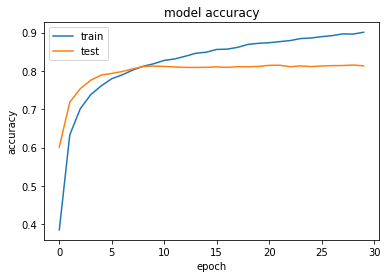

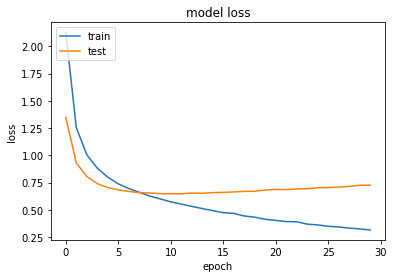

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
predictions_encoded = model.predict(test)
predictions_encoded.shape
predictions = enc.inverse_transform([np.argmax(pred) for pred in predictions_encoded])
predictions

array(['british', 'southern_us', 'italian', ..., 'italian', 'southern_us',
       'mexican'], dtype='<U12')

In [ ]:
# print train and test losses and classification accuracies
score = model.evaluate(train, label, verbose=0)
print('Train loss:', score[0])
print('Train accuracy:', score[1])

Train loss: 0.19011593439322214
Train accuracy: 0.9494141936302185


In [ ]:
Number_id = [doc['id'] for doc in testJson]
sub = pd.DataFrame({'id': Number_id, 'cuisine': predictions}, columns=['id', 'cuisine'])
sub.to_csv('output.csv', index=False)

from google.colab import files
files.download("output.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>